In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

**Exploring Dataset**

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
dataset = pd.read_csv("/kaggle/input/gurgaon-real-estate-99acres-com/gurgaon_10k.csv")

In [4]:
dataset.head(2)

,PROP_ID,PHOTO_URL,MEDIUM_PHOTO_URL,PREFERENCE,DESCRIPTION,PROPERTY_TYPE,CITY,LOCALITY,TRANSACT_TYPE,OWNTYPE,...,LOCALITY_WO_CITY,profile,xid,metadata,location,BUILTUP_SQFT,SUPER_SQFT,COMMON_FURNISHING_ATTRIBUTES,QUALITY_SCORE,FURNISHING_ATTRIBUTES
0,O71585872,https://mediacdn.99acres.com/media1/22409/13/4...,https://mediacdn.99acres.com/media1/22409/13/4...,S,4 bhk flat for resale in alpha corp gurgaon one,Residential Apartment,Gurgaon,Sector 84 Gurgaon,1.0,1,...,Sector 84,"{'CONTACT_NAME': 'gaurav khosla', 'CONTACT_COM...","{'PROJECTID': 5096, 'PROJ_NAME': 'Alpha Corp G...","{'PROP_PHOTO_COUNT': '4', 'PROP_VIDEO_COUNT': ...","{'CITY': '8', 'CITY_NAME': 'Gurgaon', 'BUILDIN...",NaN,NaN,NaN,NaN,NaN
1,T71585466,https://mediacdn.99acres.com/media1/22425/6/44...,https://mediacdn.99acres.com/media1/22425/6/44...,S,"Explore dlf ultima, an upscale ready-To-Move h...",Residential Apartment,Gurgaon,Sector 81 Gurgaon,1.0,1,...,Sector 81,"{'CONTACT_NAME': 'Kamal', 'CONTACT_COMPANY_NAM...","{'PROJECTID': 7182, 'PROJ_NAME': 'DLF The Ulti...","{'PROP_PHOTO_COUNT': '4', 'PROP_VIDEO_COUNT': ...","{'CITY': '8', 'CITY_NAME': 'Gurgaon', 'BUILDIN...",NaN,NaN,NaN,NaN,NaN


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10704 entries, 0 to 10703
Data columns (total 67 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PROP_ID                       10704 non-null  object 
 1   PHOTO_URL                     8864 non-null   object 
 2   MEDIUM_PHOTO_URL              8864 non-null   object 
 3   PREFERENCE                    10704 non-null  object 
 4   DESCRIPTION                   10704 non-null  object 
 5   PROPERTY_TYPE                 10704 non-null  object 
 6   CITY                          10704 non-null  object 
 7   LOCALITY                      10704 non-null  object 
 8   TRANSACT_TYPE                 10152 non-null  float64
 9   OWNTYPE                       10704 non-null  int64  
 10  BEDROOM_NUM                   10511 non-null  float64
 11  BATHROOM_NUM                  10704 non-null  int64  
 12  BALCONY_NUM                   10501 non-null  float64
 13  P

In [6]:
dataset.describe()

,TRANSACT_TYPE,OWNTYPE,BEDROOM_NUM,BATHROOM_NUM,BALCONY_NUM,PRICE_PER_UNIT_AREA,FURNISH,FACING,AGE,TOTAL_FLOOR,...,SUPERBUILTUP_SQFT,BROKERAGE,MIN_AREA_SQFT,MAX_AREA_SQFT,TOTAL_LANDMARK_COUNT,CITY_ID,BUILTUP_SQFT,SUPER_SQFT,COMMON_FURNISHING_ATTRIBUTES,QUALITY_SCORE
count,10152.000000,10704.000000,10511.000000,10704.000000,10501.000000,1.070400e+04,10704.000000,10704.000000,10704.000000,10697.000000,...,6712.000000,1.062300e+04,10704.000000,10704.000000,10638.000000,10704.0,2733.000000,8.750000e+02,0.0,2.0
mean,1.001182,0.968610,3.327181,3.484118,2.930959,4.919281e+04,3.298954,3.460762,3.228886,14.787137,...,2361.503528,4.915147e+04,330.136721,330.142935,20.717992,8.0,2334.236483,1.318212e+04,NaN,95.0
std,0.034362,0.304357,1.288234,1.518250,0.916045,9.227134e+05,1.231244,2.049320,2.154224,11.353743,...,3382.475458,7.898489e+05,7191.202936,7191.202775,15.659258,0.0,2879.712010,2.666606e+05,NaN,0.0
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,2.787090,2.787090,1.000000,8.0,0.000000,1.000000e+02,NaN,95.0
25%,1.000000,1.000000,3.000000,3.000000,2.000000,8.371500e+03,2.000000,1.000000,1.000000,4.000000,...,1620.000000,1.000000e+00,145.857710,145.857710,10.000000,8.0,1500.000000,1.512000e+03,NaN,95.0
50%,1.000000,1.000000,3.000000,3.000000,3.000000,1.191750e+04,4.000000,3.000000,2.000000,14.000000,...,2050.000000,1.000000e+00,192.495016,192.495016,13.000000,8.0,1900.000000,2.403000e+03,NaN,95.0
75%,1.000000,1.000000,4.000000,4.000000,4.000000,1.771950e+04,4.000000,5.000000,6.000000,22.000000,...,2690.000000,1.000000e+00,252.603257,252.603257,44.000000,8.0,2599.000000,3.240000e+03,NaN,95.0
max,2.000000,4.000000,22.000000,22.000000,4.000000,8.500000e+07,4.000000,8.000000,6.000000,51.000000,...,258879.000000,7.310000e+07,728433.842400,728433.842400,50.000000,8.0,67500.000000,7.840800e+06,NaN,95.0


In [7]:
dataset.isnull().sum()

PROP_ID                             0
PHOTO_URL                        1840
MEDIUM_PHOTO_URL                 1840
PREFERENCE                          0
DESCRIPTION                         0
                                ...  
BUILTUP_SQFT                     7971
SUPER_SQFT                       9829
COMMON_FURNISHING_ATTRIBUTES    10704
QUALITY_SCORE                   10702
FURNISHING_ATTRIBUTES           10702
Length: 67, dtype: int64

In [8]:
dataset.shape

(10704, 67)

In [9]:
dataset.duplicated().sum()

0

In [10]:
gd1 = dataset[['PROPERTY_TYPE','BEDROOM_NUM','PRICE_SQFT','AREA','PRICE','location']]

In [11]:
gd1.shape

(10704, 6)

In [12]:
gd1.head(5)

,PROPERTY_TYPE,BEDROOM_NUM,PRICE_SQFT,AREA,PRICE,location
0,Residential Apartment,4.0,8766.0,3434 sq.ft.,2.63 Cr,"{'CITY': '8', 'CITY_NAME': 'Gurgaon', 'BUILDIN..."
1,Residential Apartment,4.0,21176.0,2870 sq.ft.,3.6 Cr,"{'CITY': '8', 'CITY_NAME': 'Gurgaon', 'BUILDIN..."
2,Residential Apartment,3.0,43.0,1950 sq.ft.,"85,000","{'CITY': '8', 'CITY_NAME': 'Gurgaon', 'BUILDIN..."
3,Residential Apartment,3.0,13740.0,2802 sq.ft.,3.85 Cr,"{'CITY': '8', 'CITY_NAME': 'Gurgaon', 'BUILDIN..."
4,Residential Apartment,3.0,17.0,2290 sq.ft.,"40,000","{'CITY': '8', 'CITY_NAME': 'Gurgaon', 'BUILDIN..."


In [13]:
gd1.duplicated().sum()

225

In [14]:
gd1= gd1.drop_duplicates()

In [15]:
gd1.isnull().sum()

PROPERTY_TYPE      0
BEDROOM_NUM      193
PRICE_SQFT         0
AREA               0
PRICE              0
location           0
dtype: int64

In [16]:
gd2=gd1.dropna()

In [17]:
gd2.isnull().sum()

PROPERTY_TYPE    0
BEDROOM_NUM      0
PRICE_SQFT       0
AREA             0
PRICE            0
location         0
dtype: int64

In [18]:
gd2.shape

(10286, 6)

In [19]:
gd2.head(5)

,PROPERTY_TYPE,BEDROOM_NUM,PRICE_SQFT,AREA,PRICE,location
0,Residential Apartment,4.0,8766.0,3434 sq.ft.,2.63 Cr,"{'CITY': '8', 'CITY_NAME': 'Gurgaon', 'BUILDIN..."
1,Residential Apartment,4.0,21176.0,2870 sq.ft.,3.6 Cr,"{'CITY': '8', 'CITY_NAME': 'Gurgaon', 'BUILDIN..."
2,Residential Apartment,3.0,43.0,1950 sq.ft.,"85,000","{'CITY': '8', 'CITY_NAME': 'Gurgaon', 'BUILDIN..."
3,Residential Apartment,3.0,13740.0,2802 sq.ft.,3.85 Cr,"{'CITY': '8', 'CITY_NAME': 'Gurgaon', 'BUILDIN..."
4,Residential Apartment,3.0,17.0,2290 sq.ft.,"40,000","{'CITY': '8', 'CITY_NAME': 'Gurgaon', 'BUILDIN..."


In [20]:
def br_fi(value):
    return int(value)

In [21]:
gd2['PRICE_SQFT'] = gd2['PRICE_SQFT'].apply(br_fi)

In [22]:
gd2['BEDROOM_NUM']= gd2['BEDROOM_NUM'].apply(br_fi)

In [23]:
gd2.head(5)

,PROPERTY_TYPE,BEDROOM_NUM,PRICE_SQFT,AREA,PRICE,location
0,Residential Apartment,4,8766,3434 sq.ft.,2.63 Cr,"{'CITY': '8', 'CITY_NAME': 'Gurgaon', 'BUILDIN..."
1,Residential Apartment,4,21176,2870 sq.ft.,3.6 Cr,"{'CITY': '8', 'CITY_NAME': 'Gurgaon', 'BUILDIN..."
2,Residential Apartment,3,43,1950 sq.ft.,"85,000","{'CITY': '8', 'CITY_NAME': 'Gurgaon', 'BUILDIN..."
3,Residential Apartment,3,13740,2802 sq.ft.,3.85 Cr,"{'CITY': '8', 'CITY_NAME': 'Gurgaon', 'BUILDIN..."
4,Residential Apartment,3,17,2290 sq.ft.,"40,000","{'CITY': '8', 'CITY_NAME': 'Gurgaon', 'BUILDIN..."


In [24]:
set(gd2.PROPERTY_TYPE)

{'Independent House/Villa',
 'Independent/Builder Floor',
 'Residential Apartment'}

In [25]:
def avg_area(value):
    l1 = value.split(' ')
    if '-' in l1[0]:
        l2 = l1[0].split('-')
        l3 = (int(l2[0])+int(l2[1]))//2
        return int(l3)
    else:
        l2 = l1[0]
        return int(l2)

In [26]:
gd2['AREA'] = gd2['AREA'].apply(avg_area)

In [27]:
gd2.head(5)

,PROPERTY_TYPE,BEDROOM_NUM,PRICE_SQFT,AREA,PRICE,location
0,Residential Apartment,4,8766,3434,2.63 Cr,"{'CITY': '8', 'CITY_NAME': 'Gurgaon', 'BUILDIN..."
1,Residential Apartment,4,21176,2870,3.6 Cr,"{'CITY': '8', 'CITY_NAME': 'Gurgaon', 'BUILDIN..."
2,Residential Apartment,3,43,1950,"85,000","{'CITY': '8', 'CITY_NAME': 'Gurgaon', 'BUILDIN..."
3,Residential Apartment,3,13740,2802,3.85 Cr,"{'CITY': '8', 'CITY_NAME': 'Gurgaon', 'BUILDIN..."
4,Residential Apartment,3,17,2290,"40,000","{'CITY': '8', 'CITY_NAME': 'Gurgaon', 'BUILDIN..."


In [28]:
import re
# Function to clean and convert prices
def convert_price(value):
    # If value is a float or integer, assume it's in Rupees and convert to Lakhs
    if isinstance(value, (int, float)):
        return round(value / 100000, 2)  # Convert to Lakhs and round to 2 decimal places
 
    # If value is a string, process it accordingly
    if isinstance(value, str):
        # Handle ranges (e.g., "90.50 L - 1.50 Cr")
        if "-" in value:
            parts = value.split("-")
            converted_values = []
            for part in parts:
                match = re.findall(r"[\d\.]+", part)
                if match:
                    num = float(match[0])
                    if "L" in part:
                        converted_values.append(num)  # Already in Lakhs
                    elif "Cr" in part:
                        converted_values.append(num * 100)  # Convert Cr to Lakhs
                    else:
                        converted_values.append(num / 100000)  # Convert direct Rupees to Lakhs
            
            if converted_values:
                return round(sum(converted_values) / len(converted_values), 2)  # Take the average
        
        # Handle Lakh (L) conversion (already in Lakhs)
        if "L" in value:
            match = re.findall(r"[\d\.]+", value)
            return round(float(match[0]), 2) if match else None  
        
        # Handle Crore (Cr) conversion (convert to Lakhs)
        if "Cr" in value:
            match = re.findall(r"[\d\.]+", value)
            return round(float(match[0]) * 100, 2) if match else None  
        
        # Handle direct numeric values in string (assume they are in Rupees)
        if re.fullmatch(r"\d+(\.\d+)?", value):
            return round(float(value) / 100000, 2)  
 
    return None  # Return None for non-numeric values

In [29]:
gd2['PRICE']=gd2['PRICE'].apply(convert_price)

In [30]:
gd2.head(5)

,PROPERTY_TYPE,BEDROOM_NUM,PRICE_SQFT,AREA,PRICE,location
0,Residential Apartment,4,8766,3434,263.0,"{'CITY': '8', 'CITY_NAME': 'Gurgaon', 'BUILDIN..."
1,Residential Apartment,4,21176,2870,360.0,"{'CITY': '8', 'CITY_NAME': 'Gurgaon', 'BUILDIN..."
2,Residential Apartment,3,43,1950,NaN,"{'CITY': '8', 'CITY_NAME': 'Gurgaon', 'BUILDIN..."
3,Residential Apartment,3,13740,2802,385.0,"{'CITY': '8', 'CITY_NAME': 'Gurgaon', 'BUILDIN..."
4,Residential Apartment,3,17,2290,NaN,"{'CITY': '8', 'CITY_NAME': 'Gurgaon', 'BUILDIN..."


In [31]:
gd2.isnull().sum()

PROPERTY_TYPE      0
BEDROOM_NUM        0
PRICE_SQFT         0
AREA               0
PRICE            456
location           0
dtype: int64

In [32]:
gd3 = gd2.dropna()

In [33]:
gd3.head(5)

,PROPERTY_TYPE,BEDROOM_NUM,PRICE_SQFT,AREA,PRICE,location
0,Residential Apartment,4,8766,3434,263.0,"{'CITY': '8', 'CITY_NAME': 'Gurgaon', 'BUILDIN..."
1,Residential Apartment,4,21176,2870,360.0,"{'CITY': '8', 'CITY_NAME': 'Gurgaon', 'BUILDIN..."
3,Residential Apartment,3,13740,2802,385.0,"{'CITY': '8', 'CITY_NAME': 'Gurgaon', 'BUILDIN..."
5,Residential Apartment,3,8515,2290,195.0,"{'CITY': '8', 'CITY_NAME': 'Gurgaon', 'BUILDIN..."
7,Residential Apartment,2,11571,1400,162.0,"{'CITY': '8', 'CITY_NAME': 'Gurgaon', 'BUILDIN..."


In [34]:
gd3.isnull().sum()

PROPERTY_TYPE    0
BEDROOM_NUM      0
PRICE_SQFT       0
AREA             0
PRICE            0
location         0
dtype: int64

In [35]:
gd3.shape

(9830, 6)

In [36]:
import re

pattern = r"'LOCALITY_NAME': '(.*?)'"

def extract_location(values):
    match = re.search(pattern,values)

    if match:
        value = match.group(1)
        return value
    return 'Nan'

In [37]:
gd3['location']= gd3['location'].apply(extract_location)

In [38]:
gd3.head(5)

,PROPERTY_TYPE,BEDROOM_NUM,PRICE_SQFT,AREA,PRICE,location
0,Residential Apartment,4,8766,3434,263.0,Sector 84 Gurgaon
1,Residential Apartment,4,21176,2870,360.0,Sector 81 Gurgaon
3,Residential Apartment,3,13740,2802,385.0,Sector 112 Gurgaon
5,Residential Apartment,3,8515,2290,195.0,Sector 104 Gurgaon
7,Residential Apartment,2,11571,1400,162.0,Sector 74 Gurgaon


In [39]:
def location_small(value):
    return value.lower()

In [40]:
gd3['location']= gd3['location'].apply(location_small)

In [41]:
len(set(gd3.location))

219

In [42]:
locs = gd3.groupby('location')['location'].agg('count').sort_values(ascending=False)

In [43]:
locs

location
sector 65 gurgaon              324
sector 48 gurgaon              258
dlf phase 2                    256
sector 54 gurgaon              251
sector 102 gurgaon             249
                              ... 
dayanand colony                  1
d block sushant lok phase 1      1
sector 17b gurgaon               1
sector 10 gurgaon                1
westerlies                       1
Name: location, Length: 219, dtype: int64

In [44]:
locs52 = (locs[locs<=52])

In [45]:
locs52.nunique

<bound method IndexOpsMixin.nunique of location
sector 77 gurgaon              52
sector 46 gurgaon              51
sushant lok phase 2            51
sector 43 gurgaon              48
sushant lok phase 3            48
                               ..
dayanand colony                 1
d block sushant lok phase 1     1
sector 17b gurgaon              1
sector 10 gurgaon               1
westerlies                      1
Name: location, Length: 152, dtype: int64>

In [46]:
gd4 = gd3.copy()
gd4['location'] = gd4['location'].apply(lambda x: 'other' if x in locs52 else x)

In [47]:
len(set(gd4.location))

68

In [48]:
set(gd4.location)

{'c block sushant lok phase 1',
 'dlf phase 1',
 'dlf phase 2',
 'dlf phase 3',
 'dlf phase 4',
 'dlf phase 5',
 'gwal pahari',
 'malibu town',
 'nirvana country',
 'other',
 'palam vihar',
 'sector 102 gurgaon',
 'sector 103 gurgaon',
 'sector 104 gurgaon',
 'sector 106 gurgaon',
 'sector 107 gurgaon',
 'sector 108 gurgaon',
 'sector 109 gurgaon',
 'sector 111 gurgaon',
 'sector 112 gurgaon',
 'sector 113 gurgaon ',
 'sector 23 gurgaon',
 'sector 37c gurgaon',
 'sector 37d gurgaon',
 'sector 42 gurgaon',
 'sector 47 gurgaon',
 'sector 48 gurgaon',
 'sector 49 gurgaon',
 'sector 50 gurgaon',
 'sector 52 gurgaon',
 'sector 53 gurgaon',
 'sector 54 gurgaon',
 'sector 56 gurgaon',
 'sector 57 gurgaon',
 'sector 59 gurgaon',
 'sector 60 gurgaon',
 'sector 61 gurgaon',
 'sector 62 gurgaon',
 'sector 63 gurgaon',
 'sector 63a gurgaon',
 'sector 65 gurgaon',
 'sector 66 gurgaon',
 'sector 67 gurgaon',
 'sector 67a gurgaon',
 'sector 68 gurgaon',
 'sector 69 gurgaon',
 'sector 70 gurgaon',
 's

In [49]:
locs2 = gd4.groupby('location')['location'].agg('count').sort_values(ascending=False)

In [50]:
locs2

location
other                1486
sector 65 gurgaon     324
sector 48 gurgaon     258
dlf phase 2           256
sector 54 gurgaon     251
                     ... 
sector 52 gurgaon      59
sector 74 gurgaon      58
gwal pahari            57
sector 69 gurgaon      56
sector 91 gurgaon      55
Name: location, Length: 68, dtype: int64

In [51]:
gd4.head(5)

,PROPERTY_TYPE,BEDROOM_NUM,PRICE_SQFT,AREA,PRICE,location
0,Residential Apartment,4,8766,3434,263.0,sector 84 gurgaon
1,Residential Apartment,4,21176,2870,360.0,sector 81 gurgaon
3,Residential Apartment,3,13740,2802,385.0,sector 112 gurgaon
5,Residential Apartment,3,8515,2290,195.0,sector 104 gurgaon
7,Residential Apartment,2,11571,1400,162.0,sector 74 gurgaon


In [52]:
gd4.describe()

,BEDROOM_NUM,PRICE_SQFT,AREA,PRICE
count,9830.000000,9.830000e+03,9830.000000,9830.000000
mean,3.350865,3.292878e+04,2735.767854,330.026325
std,1.307408,9.280157e+04,13862.288843,544.771189
min,1.000000,6.000000e+00,30.000000,1.000000
25%,3.000000,8.709000e+03,1600.000000,150.000000
50%,3.000000,1.209100e+04,2095.000000,225.000000
75%,4.000000,1.779250e+04,2750.000000,375.000000
max,22.000000,6.333333e+06,577946.000000,29000.000000


In [53]:
gd4.shape

(9830, 6)

In [54]:
gd4.isnull().sum()

PROPERTY_TYPE    0
BEDROOM_NUM      0
PRICE_SQFT       0
AREA             0
PRICE            0
location         0
dtype: int64

In [55]:
gd4.duplicated().sum()

647

In [56]:
gd5 = gd4.drop_duplicates()

In [57]:
gd5.duplicated().sum()

0

In [58]:
gd5.shape

(9183, 6)

In [59]:
gd5.describe()

,BEDROOM_NUM,PRICE_SQFT,AREA,PRICE
count,9183.000000,9.183000e+03,9183.000000,9183.000000
mean,3.361647,3.342167e+04,2769.357835,330.688874
std,1.335472,9.516688e+04,14339.415609,552.768642
min,1.000000,6.000000e+00,30.000000,1.000000
25%,3.000000,8.700500e+03,1585.000000,149.000000
50%,3.000000,1.212100e+04,2095.000000,225.000000
75%,4.000000,1.798800e+04,2755.000000,375.000000
max,22.000000,6.333333e+06,577946.000000,29000.000000


In [60]:
gd5[gd5.AREA/gd5.BEDROOM_NUM<450].head

<bound method NDFrame.head of                    PROPERTY_TYPE  BEDROOM_NUM  PRICE_SQFT  AREA   PRICE  \
22     Independent/Builder Floor            3       12105  1250   115.0   
94       Independent House/Villa            7      291666  1080   350.0   
101      Independent House/Villa           19      202148   512  1035.0   
122      Independent House/Villa            8         930  1935     2.0   
128        Residential Apartment            4       14026  1711   240.0   
...                          ...          ...         ...   ...     ...   
10687    Independent House/Villa            4       14157  1554   220.0   
10693      Residential Apartment            3       14150  1000   141.0   
10695      Residential Apartment            3       13900  1000   139.0   
10696      Residential Apartment            3       14200  1000   142.0   
10697      Residential Apartment            3       14100  1000   141.0   

                 location  
22     sector 37d gurgaon  
94           

In [61]:
gd6 = gd5[~(gd5.AREA/gd5.BEDROOM_NUM<450)]
gd6.shape

(8289, 6)

In [62]:
gd6[gd6.AREA/gd6.BEDROOM_NUM<450].head

<bound method NDFrame.head of Empty DataFrame
Columns: [PROPERTY_TYPE, BEDROOM_NUM, PRICE_SQFT, AREA, PRICE, location]
Index: []>

In [63]:
gd6.shape

(8289, 6)

In [64]:
gd6.describe()

,BEDROOM_NUM,PRICE_SQFT,AREA,PRICE
count,8289.000000,8.289000e+03,8289.000000,8289.000000
mean,3.274460,2.842831e+04,2941.887079,342.375226
std,0.821305,5.750033e+04,15080.942640,573.993943
min,1.000000,6.000000e+00,450.000000,1.000000
25%,3.000000,8.888000e+03,1704.000000,157.000000
50%,3.000000,1.218300e+04,2170.000000,235.000000
75%,4.000000,1.750000e+04,2847.000000,380.000000
max,10.000000,2.071428e+06,577946.000000,29000.000000


In [65]:
gd6.head(10)

,PROPERTY_TYPE,BEDROOM_NUM,PRICE_SQFT,AREA,PRICE,location
0,Residential Apartment,4,8766,3434,263.0,sector 84 gurgaon
1,Residential Apartment,4,21176,2870,360.0,sector 81 gurgaon
3,Residential Apartment,3,13740,2802,385.0,sector 112 gurgaon
5,Residential Apartment,3,8515,2290,195.0,sector 104 gurgaon
7,Residential Apartment,2,11571,1400,162.0,sector 74 gurgaon
9,Independent/Builder Floor,3,72607,2727,220.0,sector 102 gurgaon
11,Residential Apartment,4,15463,4850,750.0,sector 60 gurgaon
12,Residential Apartment,2,11428,1400,160.0,sector 74 gurgaon
14,Residential Apartment,3,23648,1950,350.0,sector 66 gurgaon
16,Residential Apartment,5,11597,3880,450.0,other


In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

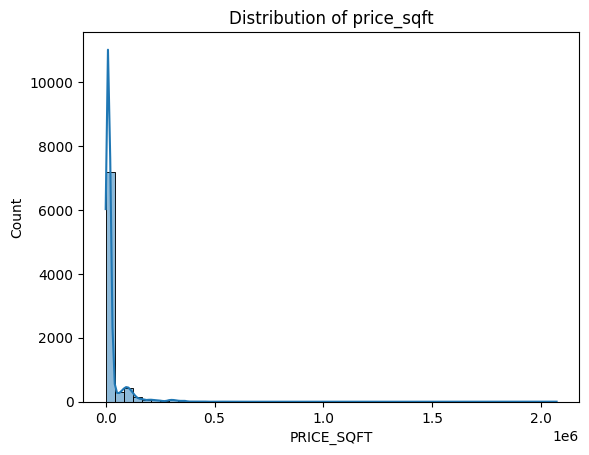

In [67]:
sns.histplot(gd6['PRICE_SQFT'],bins=50,kde=True)
plt.title("Distribution of price_sqft")
plt.show()

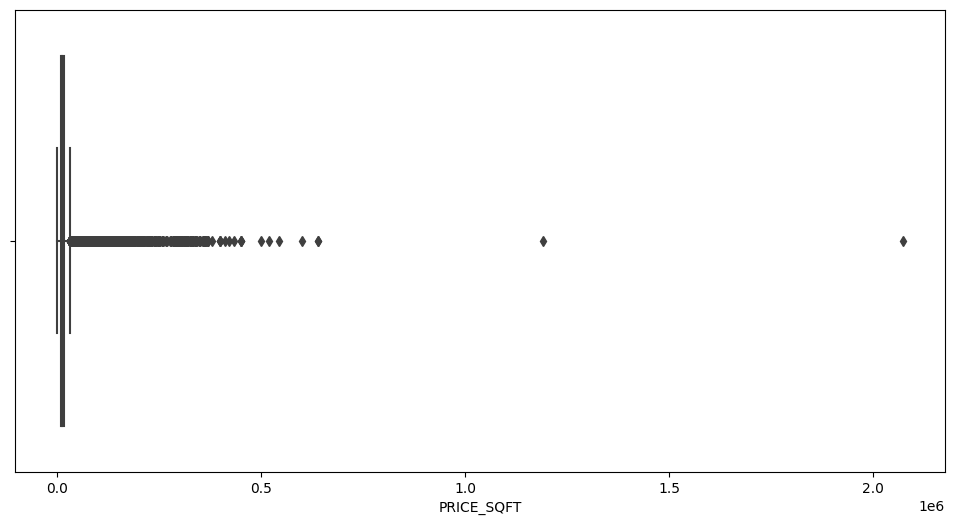

In [68]:
plt.figure(figsize=(12,6))
sns.boxplot(x=gd6['PRICE_SQFT'])
plt.show()

In [69]:
gd6['PRICE_SQFT'].describe().apply(lambda x: f"{x:,.0f}")

count        8,289
mean        28,428
std         57,500
min              6
25%          8,888
50%         12,183
75%         17,500
max      2,071,428
Name: PRICE_SQFT, dtype: object

In [70]:
gd6 = gd6[(gd6['PRICE_SQFT']>3000)&(gd6['PRICE_SQFT']<40000)]

In [71]:
gd6['PRICE_SQFT'].describe().apply(lambda x: f"{x:,.0f}")

count     7,069
mean     12,388
std       5,396
min       3,317
25%       8,615
50%      11,364
75%      14,687
max      39,871
Name: PRICE_SQFT, dtype: object

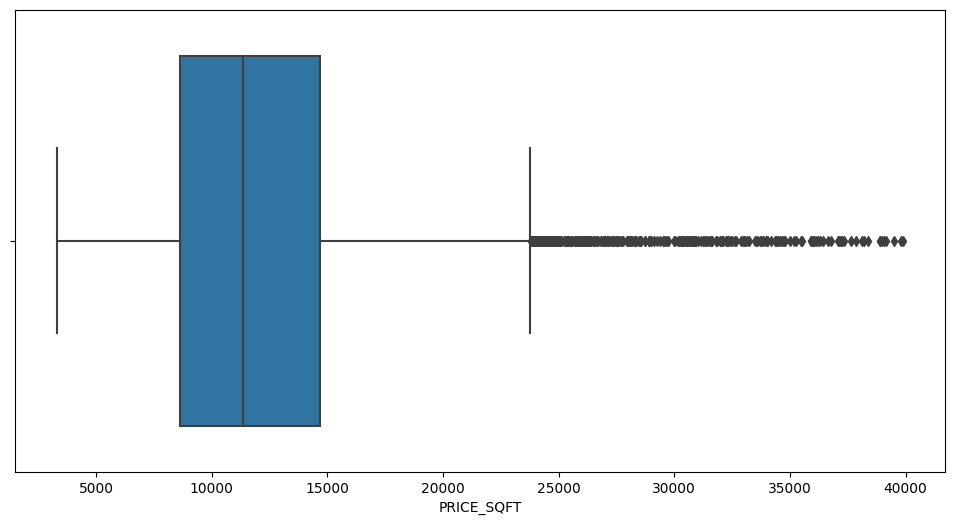

In [72]:
plt.figure(figsize=(12,6))
sns.boxplot(x=gd6['PRICE_SQFT'])
plt.show()

In [73]:
# # Print each group's price_sqft values
# for (location, BEDROOM_NUM, PROPERTY_TYPE), group in gd6.groupby(['location', 'BEDROOM_NUM', 'PROPERTY_TYPE']):
#     print(f"Location: {location}, BHK: {BEDROOM_NUM}, Property Type: {PROPERTY_TYPE}")
#     print(group['PRICE_SQFT'].values)
#     print("-" * 50)

In [74]:
gd6.groupby(['location','BEDROOM_NUM','PROPERTY_TYPE'])['PRICE_SQFT'].describe()

count  \
location                    BEDROOM_NUM PROPERTY_TYPE                      
c block sushant lok phase 1 3           Independent House/Villa      1.0   
                                        Independent/Builder Floor   12.0   
                            4           Independent House/Villa      1.0   
                                        Independent/Builder Floor    4.0   
                            9           Independent House/Villa      1.0   
...                                                                  ...   
uppals southend             2           Independent/Builder Floor    3.0   
                            3           Independent House/Villa      1.0   
                                        Independent/Builder Floor   14.0   
                            4           Independent/Builder Floor   14.0   
                            8           Independent House/Villa      1.0   

                                                                           mean  \
location                    BEDROOM_NUM PROPERTY_TYPE                             
c block sushant lok phase 1 3           Independent House/Villa    37209.000000   
                                        Independent/Builder Floor  14002.333333   
                            4           Independent House/Villa    29715.000000   
                                        Independent/Builder Floor  13361.750000   
                            9           Independent House/Villa     7625.000000   
...                                                                         ...   
uppals southend             2           Independent/Builder Floor   7829.333333   
                            3           Independent House/Villa    39871.000000   
                                        Independent/Builder Floor   8259.928571   
                            4           Independent/Builder Floor  11583.500000   
                            8           Independent House/Villa    15625.000000   

                                                                           std  \
location                    BEDROOM_NUM PROPERTY_TYPE                            
c block sushant lok phase 1 3           Independent House/Villa            NaN   
                                        Independent/Builder Floor  3821.043226   
                            4           Independent House/Villa            NaN   
                                        Independent/Builder Floor  1883.293635   
                            9           Independent House/Villa            NaN   
...                                                                        ...   
uppals southend             2           Independent/Builder Floor  2253.655771   
                            3           Independent House/Villa            NaN   
                                        Independent/Builder Floor  1647.983685   
                            4           Independent/Builder Floor  2347.450557   
                            8           Independent House/Villa            NaN   

                                                                       min  \
location                    BEDROOM_NUM PROPERTY_TYPE                        
c block sushant lok phase 1 3           Independent House/Villa    37209.0   
                                        Independent/Builder Floor   9870.0   
                            4           Independent House/Villa    29715.0   
                                        Independent/Builder Floor  11166.0   
                            9           Independent House/Villa     7625.0   
...                                                                    ...   
uppals southend             2           Independent/Builder Floor   5277.0   
                            3           Independent House/Villa    39871.0   
                                        Independent/Builder Floor   5684.0   
                            4           Independent/Builder Floor   8038.

In [75]:
gd6.shape

(7069, 6)

In [76]:
gd6.head(5)

,PROPERTY_TYPE,BEDROOM_NUM,PRICE_SQFT,AREA,PRICE,location
0,Residential Apartment,4,8766,3434,263.0,sector 84 gurgaon
1,Residential Apartment,4,21176,2870,360.0,sector 81 gurgaon
3,Residential Apartment,3,13740,2802,385.0,sector 112 gurgaon
5,Residential Apartment,3,8515,2290,195.0,sector 104 gurgaon
7,Residential Apartment,2,11571,1400,162.0,sector 74 gurgaon


In [77]:
# Function to remove outliers within each group
def remove_outliers(group):
    Q1 = group['PRICE_SQFT'].quantile(0.25)
    Q3 = group['PRICE_SQFT'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return group[(group['PRICE_SQFT'] >= lower_bound) & (group['PRICE_SQFT'] <= upper_bound)]

In [78]:
gd7 = gd6.groupby(['location', 'BEDROOM_NUM', 'PROPERTY_TYPE'], group_keys=False).apply(remove_outliers)

In [79]:
gd7.shape

(6681, 6)

In [80]:
gd7.describe()

,BEDROOM_NUM,PRICE_SQFT,AREA,PRICE
count,6681.000000,6681.000000,6681.000000,6681.000000
mean,3.191289,12109.940578,2383.777429,296.635318
std,0.770871,5079.245246,1340.138249,253.083878
min,1.000000,3317.000000,450.000000,16.000000
25%,3.000000,8561.000000,1650.000000,152.000000
50%,3.000000,11174.000000,2091.000000,220.000000
75%,4.000000,14273.000000,2711.000000,355.000000
max,9.000000,39871.000000,24300.000000,3800.000000


In [81]:
gd7[gd7['AREA']<500]

,PROPERTY_TYPE,BEDROOM_NUM,PRICE_SQFT,AREA,PRICE,location
3409,Independent/Builder Floor,1,32000,450,16.0,other
4821,Independent/Builder Floor,1,6222,450,28.0,other
6980,Residential Apartment,1,6651,482,25.0,other
8937,Residential Apartment,1,7815,499,39.0,other
9149,Residential Apartment,1,6748,489,33.0,sector 103 gurgaon
9156,Residential Apartment,1,6646,489,32.5,sector 103 gurgaon
9162,Residential Apartment,1,6952,489,34.0,sector 103 gurgaon
8458,Residential Apartment,1,4264,469,20.0,sohna
8459,Residential Apartment,1,4371,469,20.5,sohna


In [82]:
gd7['calPrice'] = round((gd7['AREA']*gd7['PRICE_SQFT'])/100000,1)

In [83]:
gd7

,PROPERTY_TYPE,BEDROOM_NUM,PRICE_SQFT,AREA,PRICE,location,calPrice
7643,Independent House/Villa,3,37209,1935,720.0,c block sushant lok phase 1,720.0
4152,Independent/Builder Floor,3,11369,1935,220.0,c block sushant lok phase 1,220.0
4375,Independent/Builder Floor,3,13055,1800,235.0,c block sushant lok phase 1,235.0
5264,Independent/Builder Floor,3,16666,1500,250.0,c block sushant lok phase 1,250.0
6626,Independent/Builder Floor,3,16000,1500,240.0,c block sushant lok phase 1,240.0
...,...,...,...,...,...,...,...
4966,Independent/Builder Floor,4,8775,2450,215.0,uppals southend,215.0
6685,Independent/Builder Floor,4,12045,2200,265.0,uppals southend,265.0
8139,Independent/Builder Floor,4,9110,2799,255.0,uppals southend,255.0
8141,Independent/Builder Floor,4,8038,2799,225.0,uppals southend,225.0


In [84]:
gd7['diffPrice'] = abs(gd7['calPrice']-gd7['PRICE'])

In [85]:
gd7.shape

(6681, 8)

In [86]:
gd8 = gd7[(gd7['diffPrice']<10)]

In [87]:
gd8.shape

(5566, 8)

In [88]:
gd8.isnull().sum()

PROPERTY_TYPE    0
BEDROOM_NUM      0
PRICE_SQFT       0
AREA             0
PRICE            0
location         0
calPrice         0
diffPrice        0
dtype: int64

In [89]:
gd8.duplicated().sum()

0

In [90]:
gd8.head(5)

,PROPERTY_TYPE,BEDROOM_NUM,PRICE_SQFT,AREA,PRICE,location,calPrice,diffPrice
7643,Independent House/Villa,3,37209,1935,720.0,c block sushant lok phase 1,720.0,0.0
4152,Independent/Builder Floor,3,11369,1935,220.0,c block sushant lok phase 1,220.0,0.0
4375,Independent/Builder Floor,3,13055,1800,235.0,c block sushant lok phase 1,235.0,0.0
5264,Independent/Builder Floor,3,16666,1500,250.0,c block sushant lok phase 1,250.0,0.0
6626,Independent/Builder Floor,3,16000,1500,240.0,c block sushant lok phase 1,240.0,0.0


In [91]:
gd9 = gd8[['PROPERTY_TYPE','BEDROOM_NUM','AREA','PRICE','location']]

In [92]:
gd9.head(5)

,PROPERTY_TYPE,BEDROOM_NUM,AREA,PRICE,location
7643,Independent House/Villa,3,1935,720.0,c block sushant lok phase 1
4152,Independent/Builder Floor,3,1935,220.0,c block sushant lok phase 1
4375,Independent/Builder Floor,3,1800,235.0,c block sushant lok phase 1
5264,Independent/Builder Floor,3,1500,250.0,c block sushant lok phase 1
6626,Independent/Builder Floor,3,1500,240.0,c block sushant lok phase 1


In [93]:
gd9.isnull().sum()

PROPERTY_TYPE    0
BEDROOM_NUM      0
AREA             0
PRICE            0
location         0
dtype: int64

In [94]:
gd9.duplicated().sum()

109

In [95]:
gd10 = gd9.drop_duplicates()

In [96]:
gd10.shape

(5457, 5)

In [97]:
gd10.head(5)

,PROPERTY_TYPE,BEDROOM_NUM,AREA,PRICE,location
7643,Independent House/Villa,3,1935,720.0,c block sushant lok phase 1
4152,Independent/Builder Floor,3,1935,220.0,c block sushant lok phase 1
4375,Independent/Builder Floor,3,1800,235.0,c block sushant lok phase 1
5264,Independent/Builder Floor,3,1500,250.0,c block sushant lok phase 1
6626,Independent/Builder Floor,3,1500,240.0,c block sushant lok phase 1


In [98]:
gd10['PROPERTY_TYPE'].unique()

array(['Independent House/Villa', 'Independent/Builder Floor',
       'Residential Apartment'], dtype=object)

In [99]:
gd10['location'].unique()

array(['c block sushant lok phase 1', 'dlf phase 1', 'dlf phase 2',
       'dlf phase 3', 'dlf phase 4', 'dlf phase 5', 'gwal pahari',
       'malibu town', 'nirvana country', 'other', 'palam vihar',
       'sector 102 gurgaon', 'sector 103 gurgaon', 'sector 104 gurgaon',
       'sector 106 gurgaon', 'sector 107 gurgaon', 'sector 108 gurgaon',
       'sector 109 gurgaon', 'sector 111 gurgaon', 'sector 112 gurgaon',
       'sector 113 gurgaon ', 'sector 23 gurgaon', 'sector 37c gurgaon',
       'sector 37d gurgaon', 'sector 42 gurgaon', 'sector 47 gurgaon',
       'sector 48 gurgaon', 'sector 49 gurgaon', 'sector 50 gurgaon',
       'sector 52 gurgaon', 'sector 53 gurgaon', 'sector 54 gurgaon',
       'sector 56 gurgaon', 'sector 57 gurgaon', 'sector 59 gurgaon',
       'sector 60 gurgaon', 'sector 61 gurgaon', 'sector 62 gurgaon',
       'sector 63 gurgaon', 'sector 63a gurgaon', 'sector 65 gurgaon',
       'sector 66 gurgaon', 'sector 67 gurgaon', 'sector 67a gurgaon',
       'sector 

In [100]:
gd10['PROPERTY_TYPE'].value_counts()

PROPERTY_TYPE
Residential Apartment        4096
Independent/Builder Floor    1279
Independent House/Villa        82
Name: count, dtype: int64

In [101]:
gd10['location'].value_counts()

location
other                          752
sector 65 gurgaon              204
sector 54 gurgaon              160
sector 48 gurgaon              151
sector 102 gurgaon             144
                              ... 
uppals southend                 26
sector 93 gurgaon               25
sector 107 gurgaon              25
c block sushant lok phase 1     17
sector 42 gurgaon                9
Name: count, Length: 68, dtype: int64

In [102]:
gd11 = pd.get_dummies(gd10,dtype=int,drop_first=False)

In [103]:
gd11.head(5)

,BEDROOM_NUM,AREA,PRICE,PROPERTY_TYPE_Independent House/Villa,PROPERTY_TYPE_Independent/Builder Floor,PROPERTY_TYPE_Residential Apartment,location_c block sushant lok phase 1,location_dlf phase 1,location_dlf phase 2,location_dlf phase 3,...,location_sector 86 gurgaon,location_sector 90 gurgaon,location_sector 91 gurgaon,location_sector 92 gurgaon,location_sector 93 gurgaon,location_sector-33 sohna,location_sohna,location_south city 1,location_sushant lok phase 1,location_uppals southend
7643,3,1935,720.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4152,3,1935,220.0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4375,3,1800,235.0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5264,3,1500,250.0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6626,3,1500,240.0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [104]:
gd11 = gd11.drop(['PROPERTY_TYPE_Residential Apartment','location_other'],axis='columns')

In [105]:
gd11.head(5)

,BEDROOM_NUM,AREA,PRICE,PROPERTY_TYPE_Independent House/Villa,PROPERTY_TYPE_Independent/Builder Floor,location_c block sushant lok phase 1,location_dlf phase 1,location_dlf phase 2,location_dlf phase 3,location_dlf phase 4,...,location_sector 86 gurgaon,location_sector 90 gurgaon,location_sector 91 gurgaon,location_sector 92 gurgaon,location_sector 93 gurgaon,location_sector-33 sohna,location_sohna,location_south city 1,location_sushant lok phase 1,location_uppals southend
7643,3,1935,720.0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4152,3,1935,220.0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4375,3,1800,235.0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5264,3,1500,250.0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6626,3,1500,240.0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [106]:
X = gd11.drop('PRICE',axis='columns')
X.head()

,BEDROOM_NUM,AREA,PROPERTY_TYPE_Independent House/Villa,PROPERTY_TYPE_Independent/Builder Floor,location_c block sushant lok phase 1,location_dlf phase 1,location_dlf phase 2,location_dlf phase 3,location_dlf phase 4,location_dlf phase 5,...,location_sector 86 gurgaon,location_sector 90 gurgaon,location_sector 91 gurgaon,location_sector 92 gurgaon,location_sector 93 gurgaon,location_sector-33 sohna,location_sohna,location_south city 1,location_sushant lok phase 1,location_uppals southend
7643,3,1935,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4152,3,1935,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4375,3,1800,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5264,3,1500,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6626,3,1500,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [107]:
y = gd11['PRICE']
y.head()

7643    720.0
4152    220.0
4375    235.0
5264    250.0
6626    240.0
Name: PRICE, dtype: float64

In [108]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [109]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(n_estimators=300,learning_rate=0.1,max_depth=4,subsample=0.8,max_features='sqrt',random_state=42)
gb.fit(X_train,y_train)
gb.score(X_test,y_test)

0.900944968598557

In [110]:
from sklearn.model_selection import cross_val_score, KFold

cv = KFold(n_splits=5, shuffle=True, random_state=42)
cross_val_results = cross_val_score(GradientBoostingRegressor(n_estimators=300,learning_rate=0.1,max_depth=4,subsample=0.8,max_features='sqrt',random_state=42), X, y, cv=cv)

In [111]:
cross_val_results

array([0.89746498, 0.82497606, 0.90685808, 0.87019375, 0.9208722 ])

In [112]:
y_pred = gb.predict(X_test)

In [113]:
from sklearn.metrics import mean_squared_error
import numpy as np
 
mse = mean_squared_error(y_test, y_pred)  # Calculate Mean Squared Error
rmse = np.sqrt(mse)  # Take square root to get RMSE
 
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 78.80376669877471


In [114]:
gb.score(X_train,y_train)

0.9380693465275983

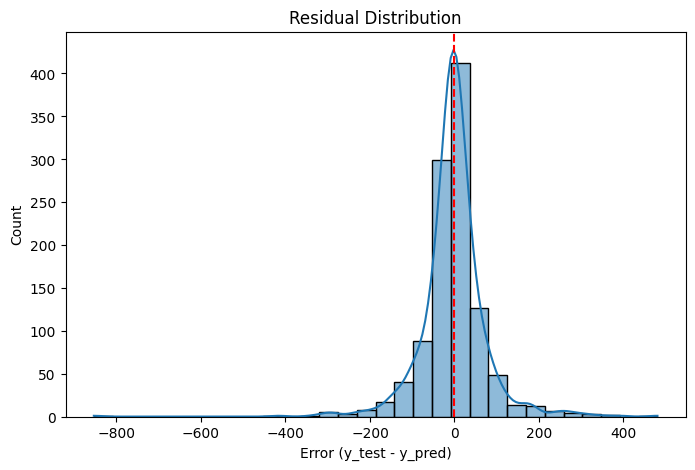

In [115]:
residuals = y_test - y_pred
 
plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True, bins=30)
plt.axvline(0, color='red', linestyle='dashed')  # Ideal center
plt.title("Residual Distribution")
plt.xlabel("Error (y_test - y_pred)")
plt.show()

In [116]:
def scatter_plot(df,location):
    bhk2 = df[(df.location==location)&(df.BEDROOM_NUM==2)]
    bhk3 = df[(df.location==location)&(df.BEDROOM_NUM==3)]
    # matplotlib.rcparams['figure.figsize']=(15,10)
    plt.scatter(bhk2.AREA,bhk2.PRICE_SQFT,color='red',label='2 BHK',s=10)
    plt.scatter(bhk3.AREA,bhk3.PRICE_SQFT,color='blue',label='3 BHK',s=10)
    plt.xlabel("AREA")
    plt.ylabel('price_sqft')
    plt.title(location)
    plt.legend()

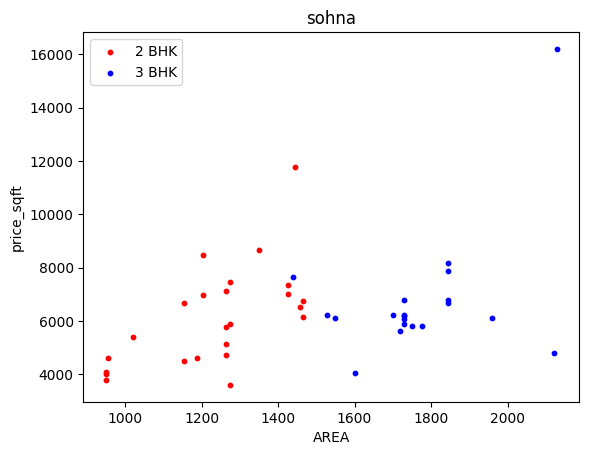

In [117]:
scatter_plot(gd8,'sohna')

In [118]:
def remove_bhk_outliers(df):
    exclude_indices=np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('BEDROOM_NUM'):
                     bhk_stats[bhk] = { 'mean': np.mean(bhk_df.PRICE_SQFT), 
                                         'std': np.std(bhk_df.PRICE_SQFT), 
                                         'count': bhk_df.shape[0]
                                       } 
        for bhk, bhk_df in location_df.groupby('BEDROOM_NUM'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.PRICE_SQFT<(stats['mean'])].index.values)
 
    return df.drop(exclude_indices, axis='index')

In [119]:
dg1 = remove_bhk_outliers(gd8)

In [120]:
dg1.shape

(3981, 8)

In [121]:
dg1.head(5)

,PROPERTY_TYPE,BEDROOM_NUM,PRICE_SQFT,AREA,PRICE,location,calPrice,diffPrice
7643,Independent House/Villa,3,37209,1935,720.0,c block sushant lok phase 1,720.0,0.0
4152,Independent/Builder Floor,3,11369,1935,220.0,c block sushant lok phase 1,220.0,0.0
4375,Independent/Builder Floor,3,13055,1800,235.0,c block sushant lok phase 1,235.0,0.0
5264,Independent/Builder Floor,3,16666,1500,250.0,c block sushant lok phase 1,250.0,0.0
6626,Independent/Builder Floor,3,16000,1500,240.0,c block sushant lok phase 1,240.0,0.0


In [122]:
dg2 = dg1[['PROPERTY_TYPE','BEDROOM_NUM','AREA','PRICE','location']]

In [123]:
dg2.head(5)

,PROPERTY_TYPE,BEDROOM_NUM,AREA,PRICE,location
7643,Independent House/Villa,3,1935,720.0,c block sushant lok phase 1
4152,Independent/Builder Floor,3,1935,220.0,c block sushant lok phase 1
4375,Independent/Builder Floor,3,1800,235.0,c block sushant lok phase 1
5264,Independent/Builder Floor,3,1500,250.0,c block sushant lok phase 1
6626,Independent/Builder Floor,3,1500,240.0,c block sushant lok phase 1


In [124]:
dg2 = pd.get_dummies(dg2,dtype=int,drop_first=False)

In [125]:
dg2.head(5)

,BEDROOM_NUM,AREA,PRICE,PROPERTY_TYPE_Independent House/Villa,PROPERTY_TYPE_Independent/Builder Floor,PROPERTY_TYPE_Residential Apartment,location_c block sushant lok phase 1,location_dlf phase 1,location_dlf phase 2,location_dlf phase 3,...,location_sector 86 gurgaon,location_sector 90 gurgaon,location_sector 91 gurgaon,location_sector 92 gurgaon,location_sector 93 gurgaon,location_sector-33 sohna,location_sohna,location_south city 1,location_sushant lok phase 1,location_uppals southend
7643,3,1935,720.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4152,3,1935,220.0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4375,3,1800,235.0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5264,3,1500,250.0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6626,3,1500,240.0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [126]:
dg2 = dg2.drop(['PROPERTY_TYPE_Residential Apartment','location_other'],axis='columns')

In [127]:
dg2.head(5)

,BEDROOM_NUM,AREA,PRICE,PROPERTY_TYPE_Independent House/Villa,PROPERTY_TYPE_Independent/Builder Floor,location_c block sushant lok phase 1,location_dlf phase 1,location_dlf phase 2,location_dlf phase 3,location_dlf phase 4,...,location_sector 86 gurgaon,location_sector 90 gurgaon,location_sector 91 gurgaon,location_sector 92 gurgaon,location_sector 93 gurgaon,location_sector-33 sohna,location_sohna,location_south city 1,location_sushant lok phase 1,location_uppals southend
7643,3,1935,720.0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4152,3,1935,220.0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4375,3,1800,235.0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5264,3,1500,250.0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6626,3,1500,240.0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [128]:
X = dg2.drop('PRICE',axis='columns')
X.head()

,BEDROOM_NUM,AREA,PROPERTY_TYPE_Independent House/Villa,PROPERTY_TYPE_Independent/Builder Floor,location_c block sushant lok phase 1,location_dlf phase 1,location_dlf phase 2,location_dlf phase 3,location_dlf phase 4,location_dlf phase 5,...,location_sector 86 gurgaon,location_sector 90 gurgaon,location_sector 91 gurgaon,location_sector 92 gurgaon,location_sector 93 gurgaon,location_sector-33 sohna,location_sohna,location_south city 1,location_sushant lok phase 1,location_uppals southend
7643,3,1935,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4152,3,1935,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4375,3,1800,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5264,3,1500,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6626,3,1500,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [129]:
y = dg2['PRICE']
y.head()

7643    720.0
4152    220.0
4375    235.0
5264    250.0
6626    240.0
Name: PRICE, dtype: float64

In [130]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [131]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(n_estimators=300,learning_rate=0.1,max_depth=4,subsample=0.8,max_features='sqrt',random_state=42)
gb.fit(X_train,y_train)
gb.score(X_test,y_test)

0.9423752905793498

In [132]:
from sklearn.model_selection import cross_val_score, KFold

cv = KFold(n_splits=5, shuffle=True, random_state=42)
cross_val_results = cross_val_score(GradientBoostingRegressor(n_estimators=300,learning_rate=0.1,max_depth=4,subsample=0.8,max_features='sqrt',random_state=42), X, y, cv=cv)

In [133]:
cross_val_results

array([0.94298056, 0.88064119, 0.91594   , 0.91344021, 0.96012697])

In [134]:
y_pred = gb.predict(X_test)

In [135]:
from sklearn.metrics import mean_squared_error
import numpy as np
 
mse = mean_squared_error(y_test, y_pred)  # Calculate Mean Squared Error
rmse = np.sqrt(mse)  # Take square root to get RMSE
 
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 61.444143410978334


In [136]:
x_pred = gb.predict(X_train)
mse2 = mean_squared_error(y_train, x_pred)  # Calculate Mean Squared Error
rmse2 = np.sqrt(mse2)  # Take square root to get RMSE
 
print("Root Mean Squared Error (RMSE):", rmse2)

Root Mean Squared Error (RMSE): 45.76237985143153


In [137]:
gb.score(X_train,y_train)

0.969089337375957

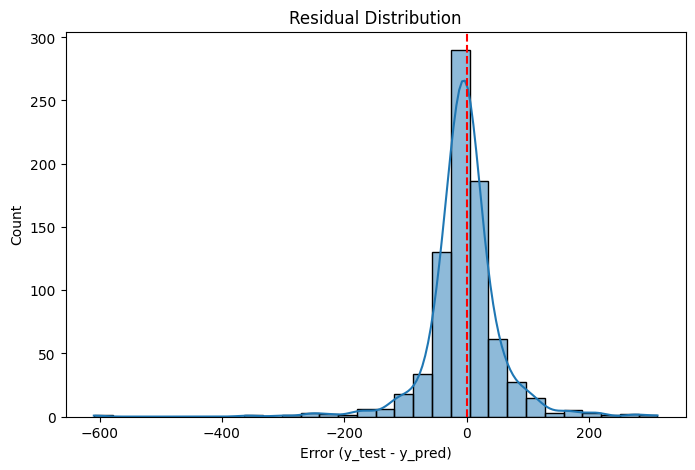

In [138]:
residuals = y_test - y_pred
 
plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True, bins=30)
plt.axvline(0, color='red', linestyle='dashed')  # Ideal center
plt.title("Residual Distribution")
plt.xlabel("Error (y_test - y_pred)")
plt.show()

In [139]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

from sklearn.linear_model import Lasso, LinearRegression
from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor
 
def find_best_model_using_gridsearchcv(X,y):
    algos = {
                'linear_regression': 
                { 
                    'model': LinearRegression(),
                    'params': {
                    }
                },
             'lasso': 
             {
                 'model': Lasso(),
                 'params': {
                     'alpha': [1,2], 
                     'selection': ['random', 'cyclic']
                 }
             },
            'decision tree': 
             {
                 'model': DecisionTreeRegressor(),
                 'params': {
                     'criterion': ['mse', 'friedman_mse'],
                     'splitter': ['best', 'random']
                  }
             },
            'random forest': 
             {
                 'model': RandomForestRegressor(),
                 'params': {
                  }
             }
            }
    scores = []
 
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
 
    for algo_name, config in algos.items():
 
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
 
        gs.fit(X,y)
 
        scores.append({
 
        'model': algo_name,
 
        'best_score': gs.best_score_,
 
        'best params': gs.best_params_
 
        })
 
    return pd.DataFrame (scores, columns=['model', 'best_score', 'best_params'])
    
 
find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.849580,NaN
1,lasso,0.824877,NaN
2,decision tree,0.895544,NaN
3,random forest,0.914275,NaN


In [140]:
len(dg1['location'].unique())

68

In [141]:
final_columns = list(X_train.columns)

In [142]:
len(final_columns)

71

In [143]:
l = gd8[(gd8['PROPERTY_TYPE']=='Residential Apartment')]

In [144]:
l[l['location']=='other']

,PROPERTY_TYPE,BEDROOM_NUM,PRICE_SQFT,AREA,PRICE,location,calPrice,diffPrice
3851,Residential Apartment,1,3486,760,26.5,other,26.5,0.0
5081,Residential Apartment,1,7500,1122,79.0,other,84.2,5.2
6980,Residential Apartment,1,6651,482,25.0,other,32.1,7.1
8937,Residential Apartment,1,7815,499,39.0,other,39.0,0.0
395,Residential Apartment,2,8791,1365,120.0,other,120.0,0.0
...,...,...,...,...,...,...,...,...
6159,Residential Apartment,5,12025,7900,950.0,other,950.0,0.0
7031,Residential Apartment,5,11000,10000,1100.0,other,1100.0,0.0
9843,Residential Apartment,5,11546,3880,448.0,other,448.0,0.0
91,Residential Apartment,6,11214,5350,600.0,other,599.9,0.1


In [145]:
dg2[1000:1150]

,BEDROOM_NUM,AREA,PRICE,PROPERTY_TYPE_Independent House/Villa,PROPERTY_TYPE_Independent/Builder Floor,location_c block sushant lok phase 1,location_dlf phase 1,location_dlf phase 2,location_dlf phase 3,location_dlf phase 4,...,location_sector 86 gurgaon,location_sector 90 gurgaon,location_sector 91 gurgaon,location_sector 92 gurgaon,location_sector 93 gurgaon,location_sector-33 sohna,location_sohna,location_south city 1,location_sushant lok phase 1,location_uppals southend
2019,3,1852,227.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2759,3,1350,162.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2857,3,1827,240.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3387,3,1855,263.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3729,3,2103,233.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8159,2,1400,180.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10673,2,1366,200.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2039,3,1593,190.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3286,3,1359,162.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [146]:
final_columns

['BEDROOM_NUM',
 'AREA',
 'PROPERTY_TYPE_Independent House/Villa',
 'PROPERTY_TYPE_Independent/Builder Floor',
 'location_c block sushant lok phase 1',
 'location_dlf phase 1',
 'location_dlf phase 2',
 'location_dlf phase 3',
 'location_dlf phase 4',
 'location_dlf phase 5',
 'location_gwal pahari',
 'location_malibu town',
 'location_nirvana country',
 'location_palam vihar',
 'location_sector 102 gurgaon',
 'location_sector 103 gurgaon',
 'location_sector 104 gurgaon',
 'location_sector 106 gurgaon',
 'location_sector 107 gurgaon',
 'location_sector 108 gurgaon',
 'location_sector 109 gurgaon',
 'location_sector 111 gurgaon',
 'location_sector 112 gurgaon',
 'location_sector 113 gurgaon ',
 'location_sector 23 gurgaon',
 'location_sector 37c gurgaon',
 'location_sector 37d gurgaon',
 'location_sector 42 gurgaon',
 'location_sector 47 gurgaon',
 'location_sector 48 gurgaon',
 'location_sector 49 gurgaon',
 'location_sector 50 gurgaon',
 'location_sector 52 gurgaon',
 'location_sector

In [147]:
def predict_price(bhk, area, property_type, location):
    # Step 1: Create a zero-filled input vector
    input_vector = np.zeros(len(final_columns))
 
    # Step 2: Create a mapping from column name to index
    col_index_map = {col: idx for idx, col in enumerate(final_columns)}
 
    # Step 3: Set bhk and area
    if 'BEDROOM_NUM' in col_index_map:
        input_vector[col_index_map['BEDROOM_NUM']] = bhk
    if 'AREA' in col_index_map:
        input_vector[col_index_map['AREA']] = area
 
    # Step 4: Set property_type dummy
    prop_col = f'property_type_{property_type}'
    if prop_col in col_index_map:
        input_vector[col_index_map[prop_col]] = 1
 
    # Step 5: Set location dummy
    loc_col = f'location_{location}'
    if loc_col in col_index_map:
        input_vector[col_index_map[loc_col]] = 1
 
    # Step 6: Convert to DataFrame (1 row, correct column names)
    input_df = pd.DataFrame([input_vector], columns=final_columns)
 
    # Step 7: Predict
    return gb.predict(input_df)[0]

In [148]:
predict_price(3,1800,'PROPERTY_TYPE_Independent/Builder Floor','location_c block sushant lok phase 1')

196.87839864030266

In [149]:
predict_price(4,2800,'PROPERTY_TYPE_Independent/Builder Floor','location_dlf phase 2')

383.46324321175916

In [150]:
predict_price(2,1400,'Residential Apartment','other')

132.00019087116857

In [151]:
predict_price(3,1800,'PROPERTY_TYPE_Independent/Builder Floor','location_sector 82 gurgaon')

196.87839864030266

Text(0.5, 1.0, 'Top feature_importance')

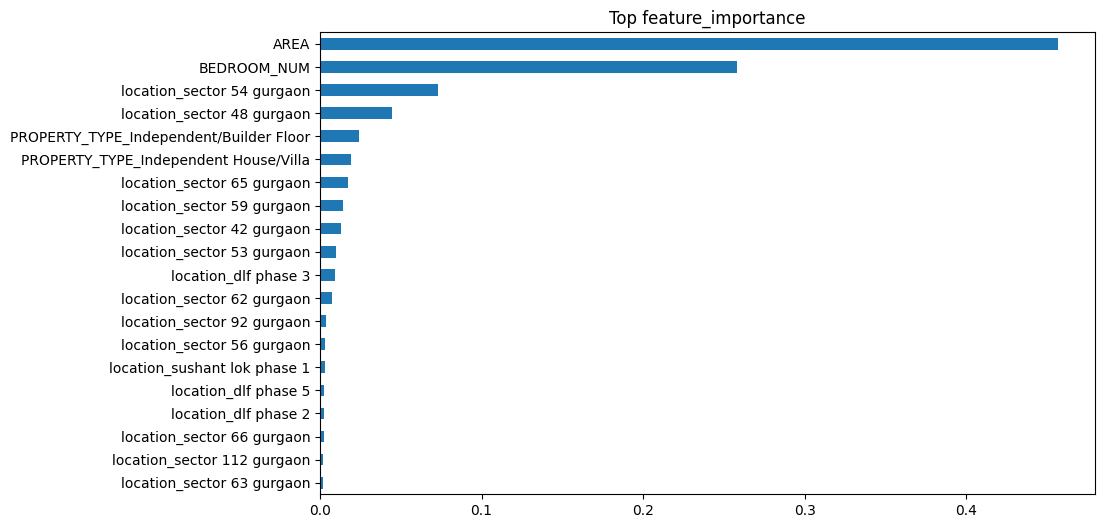

In [152]:
feature_importance = pd.Series(gb.feature_importances_,index=final_columns)
top_n=20
feature_importance.sort_values(ascending=True).tail(top_n).plot(kind='barh',figsize=(10,6))
plt.title("Top feature_importance")

In [154]:
import pickle
with open('GRM.pickle','wb') as f:
    pickle.dump(gb,f)

In [155]:
import json
columns = { 'data_columns' : [col.lower() for col in X.columns] }
with open('columns.json','w') as f:
    f.write(json.dumps(columns))